## Lecture 3 Numpy, Pandas

2023-02-28

Vítek Macháček (based on Martin Hronec's lecture)

### Table of contents

1. [Numpy](#numpy)
2. [Pandas](#pandas)

# 5 min warmup

* What is a a keyword?

* How is python indexed?

* What does for-loop do?

* What is an exception?

* What datatype is '5'?

* What is a function? How to write meaningful functions?

# Moving forward from Python's primitive data types
* Q: can you name the primitives?


# Numpy <a name="numpy"></a>

* Num(erical) Py(thon)
* NumPy is at the base of Python's scientific stack of tools 
* Python already has *high-level number objects* (integers, floating point) and *containers*  (lists, dictionaries ) 
* np arrays contain only one type - unlike general lists
* **Memory-efficient container that provides fast numerical operations.**

### Vectorized operations
* Python is interpreted language => slow!

In [1]:
# np is alias ""(used when name of the packages are too long or coders are rightly lazy)
import numpy as np
import pandas as pd
# very common usage

random_array = np.random.randint(1000, size=10**5)
random_list = list(random_array)
random_array

array([233, 599, 640, ..., 276, 958,  82])

In [2]:
%timeit sum(random_list)
%timeit np.sum(random_array)

8.78 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
99.4 µs ± 732 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Solution: Numpy
* **ndarray**
    * Fixed datatype
    * Fixed shape

<img src="https://scipy-lectures.org/_images/threefundamental.png" width="700" height="500">

* Contains:    
    * raw data 
    * how to locate an element
    * how to interpret an element

### Basic properties

In [3]:
#simple array
a = np.array([0, 1, 2, 3, 4])
a

array([0, 1, 2, 3, 4])

In [4]:
a.dtype

dtype('int64')

In [5]:
a.shape

(5,)

In [6]:
a.ndim

1

In [7]:
a.data

## How can you define a matrix?

### Manual creation

In [8]:
#multi dimensional objects
# array of array is a matrix
a = np.array([
    [1,3], [2,3]
])

In [9]:
a.shape

(2, 2)

In [10]:
a

array([[1, 3],
       [2, 3]])

Construct 3D array manually (focus on the brackets)



In [11]:
a = np.array([
    [[1,3,], [2,4]],
    [[3,5], [4,6]]
])
print(a)
print(a.shape)
print(a.ndim)

[[[1 3]
  [2 4]]

 [[3 5]
  [4 6]]]
(2, 2, 2)
3


Construct array like a civilized person. 

In [12]:
list(range(5))

[0, 1, 2, 3, 4]

In [13]:
# evenly spaced
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# chain operations on a single object
np.arange(10).reshape((2,5)).mean(axis=0)

array([2.5, 3.5, 4.5, 5.5, 6.5])

In [15]:
#generate sequences

# number of points from an interval
start = 0
end = 1
n_points = 100
np.linspace(start, end, n_points)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

Q: What went wrong above?

# A crucial skill

### Indexing and Slicing
* In 2D, the first dimension corresponds to rows, the second to columns.
* in the multidimensional case, `a[0]` gives all elements in the unspecified dimension

In [21]:
# create toy diagonal matrix
a = np.arange(16).reshape((4,4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:

# print(a[2]) 

# print(a[2,:]) #slicing - equivalent to first

# print(a[2][2]) #access single element matrix
# print(a[2,2])

# print(a[:,1])

print(a[:,-2:])

In [28]:
a[0:3:2]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [29]:
# select from start to an end with certain step (could be zero instead of missing)
# advanced tricks

a[:3:2,:3:2] #step n is every n-th observation

array([[ 0,  2],
       [ 8, 10]])

In [30]:
s = np.arange(100)
print(s)
# step can also be negative
# start:end:step
print(s[:80:-3])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[99 96 93 90 87 84 81]


**Copies vs. views**
* a slicing creates a **view** on the original array (just a way of accessing array data)
    * the original array is not copied in memory
* when modifying the view, the original array is modified as well! (SURPRISE, SURPRISE)
    * allows to save memory and time
* In CS it is called **shallow copy** vs **deep copy**

In [31]:
print(np.may_share_memory(a, a[1:]))

True


In [33]:
a = np.arange(10)
print(a)

# print(np.may_share_memory(a, a[1:]))
b = a 
b[2] = 22

#print(a.data, b.data)

print(np.may_share_memory(a, b))

print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
True
[ 0  1 22  3  4  5  6  7  8  9]
[ 0  1 22  3  4  5  6  7  8  9]


In [35]:
a = np.arange(10)
b = a.copy()  # force a copy
b[2] = 22
print(b)
print(a)

print(np.may_share_memory(a, b))
#print(a.data, c.data)

[ 0  1 22  3  4  5  6  7  8  9]
[0 1 2 3 4 5 6 7 8 9]
False


In [37]:
a = np.arange(16).reshape((4,4))

b = a[2:4,2:4]
b

array([[10, 11],
       [14, 15]])

In [38]:
b[0,0] = 100
a

array([[  0,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9, 100,  11],
       [ 12,  13,  14,  15]])

### typical mistake in pandas slicing dataframes -> stay tuned!

SettingWithCopyWarning:
 
A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead

**Speed of basic numpy operations**
   * much faster then in pure python

**Changing shape of an array**
* flattening
* reshaping (inverse of flattening)

In [39]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
# flattening
print(a.flatten())


[1 2 3 4 5 6]


In [41]:
print(a.shape)
a.T

(2, 3)


array([[1, 4],
       [2, 5],
       [3, 6]])

In [42]:
a.T.flatten() #or usre flatten/ravel order='F' in Fortran column-wise order

array([1, 4, 2, 5, 3, 6])

In [43]:
a.T.flatten(order='F')

array([1, 2, 3, 4, 5, 6])

In [44]:
np.exp(a) # a bit like R - vectorized operations

array([[  2.71828183,   7.3890561 ,  20.08553692],
       [ 54.59815003, 148.4131591 , 403.42879349]])

In [50]:
np.sum(a,axis=1)

array([ 6, 15])

**Pictures? Just pixels.**

In [51]:
# we will get to the matplotlib and pyplot in the last part of the lecture
import matplotlib.pyplot as plt
# another ipython magic
%matplotlib inline 

Matplotlib is building the font cache; this may take a moment.


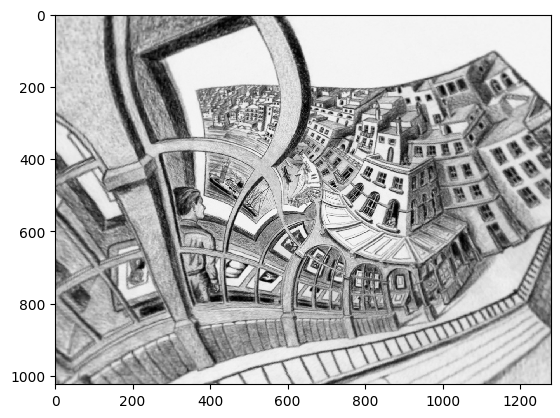

In [57]:
# for more M.C. Escher's pictures: https://www.mcescher.com/
img = plt.imread('auxiliary/mc_escher_print gallery.png')
plt.imshow(img,interpolation='nearest', aspect='auto')

In [58]:
img

array([[[0.7529412 , 0.7529412 , 0.7529412 , 1.        ],
        [0.7411765 , 0.7411765 , 0.7411765 , 1.        ],
        [0.7372549 , 0.7372549 , 0.7372549 , 1.        ],
        ...,
        [0.95686275, 0.95686275, 0.95686275, 1.        ],
        [0.95686275, 0.95686275, 0.95686275, 1.        ],
        [0.95686275, 0.95686275, 0.95686275, 1.        ]],

       [[0.75686276, 0.75686276, 0.75686276, 1.        ],
        [0.7490196 , 0.7490196 , 0.7490196 , 1.        ],
        [0.74509805, 0.74509805, 0.74509805, 1.        ],
        ...,
        [0.95686275, 0.95686275, 0.95686275, 1.        ],
        [0.95686275, 0.95686275, 0.95686275, 1.        ],
        [0.95686275, 0.95686275, 0.95686275, 1.        ]],

       [[0.76862746, 0.76862746, 0.76862746, 1.        ],
        [0.75686276, 0.75686276, 0.75686276, 1.        ],
        [0.75686276, 0.75686276, 0.75686276, 1.        ],
        ...,
        [0.95686275, 0.95686275, 0.95686275, 1.        ],
        [0.95686275, 0.956862

In [59]:
# image shape as (H, W, D), depth: https://www.wikiwand.com/en/Color_depth
img.shape

(1024, 1280, 4)

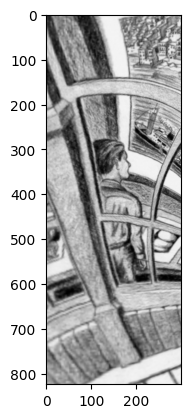

In [60]:
plt.imshow(img[200:,200:500])

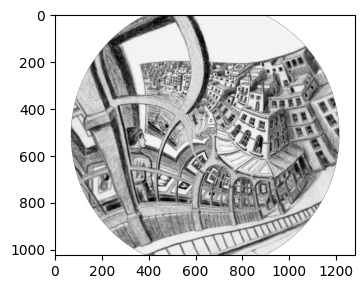

In [71]:
lx, ly, ld = img.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4
masked = img.copy()
masked[mask] = 0

plt.figure(figsize=(3, 3))
plt.axes([0, 0, 1, 1])
plt.imshow(masked, cmap=plt.cm.gray)

# Pandas <a name="pandas"></a>

* Pan(el) Da(ta)
* go-to package for data analysis in Python
* designed for working with "labeled" (relational data)
* developed by Wes McKinney in 2008 while at AQR Capital Management out of the need for a tool to perform quantitative analysis on financial data (convinced AQR to open-source it)

* two primary data structures:
    * *Series* (1D labeled homogeneously-typed array)
    * *DataFrame* (2D labeled, tabular structure with potentially heterogeneously-typed column)
* more dimensions? MultiIndex.
* built on top of NumPy

In [ ]:
import pandas as pd
import sys

In [ ]:
print(f'Python version {sys.version}')
print(f'Pandas version {pd.__version__}')

## Data structures in pandas

### Series
* 1D labeled array able to hold any data type (int,str,float, Python objects, etc.)

In [75]:
pd.Series([1,-1,1,-1])

0    1
1   -1
2    1
3   -1
dtype: int64

`data` (in the example above) can be:
    * a dict
    * a list
    * an ndarray
    * a scalar value


Examples of from dict and a scalar value below:

In [76]:
# in case of dictionary
pd.Series({'aa':1, 'aaa':'b', 'aaa':'g'})

aa     1
aaa    g
dtype: object

In [77]:
pd.Series(np.arange(5), index=['a', 'b', 'c', 'd','e'])

a    0
b    1
c    2
d    3
e    4
dtype: int64

* a key difference between Series/pandas and ndarray: operations between Series automatically align the data based on label

In [80]:
a = pd.Series({'Vítek':5, 'Martin':10, 'Honza':0})
b = pd.Series({'Martin':20,'Honza':15,'Vítek':5})
print(f'A:\n{a}\nB:\n{b}')
a+ b

A:
Vítek      5
Martin    10
Honza      0
dtype: int64
B:
Martin    20
Honza     15
Vítek      5
dtype: int64


Honza     15
Martin    30
Vítek     10
dtype: int64

In [81]:
a = [5,10,0]
b = [20,15,5]

np.array(a) + np.array(b) # now works as expected

array([25, 25,  5])

* looping through (value-by-value) usually not necessary, remember the case of np array

###  DataFrame

* a 2D labeled data structure with columns of potentially different types
* like a spreadsheet or SQL table, or a dict of Series objects
* the most frequently used pandas object 
* can be created:
    * typically by reading a csv file
    * dict of 1D ndarrays, lists, dicts, Series
    * 2D numpy.ndarray
    * a Series
    * another DataFrame

In [ ]:
pd.DataFrame({'var':[1,2,3], 'column2':[0,0,0]})

In [ ]:
# from dict of Series
d = {'one': pd.Series([1., 2., 3.],     index=['a', 'e', 'c']),
     'two': pd.Series([2., 1., 3., 4.], index=['b', 'a', 'c', 'd'])}

df = pd.DataFrame(d)
df

Now that we have our data unzipped, we can load them into Python, specifically using Pandas tools.

### Data I/O (in/out)
* CSV, JSON, HTML, Excel, HDF5, SQL, pickle, ...
    * for specific details, see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)
* `pd.read_csv()` is the workhorse for reading text files
    * large number of params means great flexibility when getting data in
    
We will work with the course evaluation data from FSV.
  * each observation is a response to the following questionare (... hope it reminds you of something)

In [97]:
# load the "raw" data for one particular year
df = pd.read_csv('auxiliary/data_2017_zs.csv', sep = ';', on_bad_lines= 'skip')
df.head()

,cislo_dot,kod_predm,nazev_predm,prednasejici,cvicici,q1,q2,q3,q4,q5,...,q7,q8,q9,q10,q11,q12,q13,t1,t2,katedra_code
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [98]:
df.columns

Index(['cislo_dot', 'kod_predm', 'nazev_predm', 'prednasejici', 'cvicici',
       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 't1', 't2', 'katedra_code'],
      dtype='object')

In [99]:
# raw data have column names in czech, let's rename them
# if you do not want to reassign, you can provide arg. "inplace = True"
df = df.rename(columns = {
    'cislo_dot' : 'number',
    'kod_predm' : 'course_code',
    'nazev_predm' : 'course_title',
    'prednasejici' : 'teachers',
    'cvicici' : 'seminar_leaders',
    't1': 'c_value',
    't2': 'c_improve', 
    'katedra_code' : 'department_code'
})
df.head()

,number,course_code,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,...,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
0,1,JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,...,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
1,2,JLB003,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,...,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
2,3,NMMA701,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,...,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
3,4,JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,...,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
4,5,JEB055,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,...,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [100]:
# iterative
df.index

RangeIndex(start=0, stop=6995, step=1)

In [125]:
# set column named "course_code" to be an index (or you can use "inplace" option again)
df.set_index('number', inplace=True)

In [126]:
# look at the data but refrain from drawing the conclusions
df.head(5)

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
2,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,8.0
3,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0


In [127]:
# make a copy of original data, so if you mess up, can go back to this
# not that smart when you are working with the large data
df_copy = df.copy(deep = True)

* `pd.DataFrame.copy()`:
    * deep: modifications to the data or indices of the copy will not be reflected in the original object
    * shallow: any changes to the data of the original will be reflected in the shallow copy (and vice versa)

In [128]:
# try to call it as a function
# df.shape() # it si an attribute not a function
df.shape

(6995, 20)

In [129]:
# classical data summarization
df.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
count,6847.000000,6827.000000,5458.000000,5457.000000,5458.000000,2600.000000,2600.000000,2600.000000,6776.000000,6829.000000,6783.000000,6801.000000,6798.00000,6810.000000
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739,7.391630
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351,1.496288
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,3.000000,4.00000,6.000000
50%,4.000000,3.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000,4.000000,4.000000,5.00000,8.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.00000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,10.000000


In [130]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995 entries, 1 to 6997
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   course_title     6995 non-null   object 
 1   teachers         5434 non-null   object 
 2   seminar_leaders  2588 non-null   object 
 3   q1               6847 non-null   float64
 4   q2               6827 non-null   float64
 5   q3               5458 non-null   float64
 6   q4               5457 non-null   float64
 7   q5               5458 non-null   float64
 8   q6               2600 non-null   float64
 9   q7               2600 non-null   float64
 10  q8               2600 non-null   float64
 11  q9               6776 non-null   float64
 12  q10              6829 non-null   float64
 13  q11              6783 non-null   float64
 14  q12              6801 non-null   float64
 15  q13              6798 non-null   float64
 16  c_value          2183 non-null   object 
 17  c_improve     

In [131]:
# memory usage of each column in bytes (useful when working with the larger datasets)
df.memory_usage()

Index              55960
course_title       55960
teachers           55960
seminar_leaders    55960
q1                 55960
q2                 55960
q3                 55960
q4                 55960
q5                 55960
q6                 55960
q7                 55960
q8                 55960
q9                 55960
q10                55960
q11                55960
q12                55960
q13                55960
c_value            55960
c_improve          55960
department_code    55960
sumq1q2            55960
dtype: int64

* you can treat a DataFrame semantically like a dict of like-indexed Series objects
    * getting, setting, and deleting columns works with the same syntax as the analogous dict operations

## Indexing/Selection

| Operation                      | Syntax        |  Result   |
|--------------------------------|---------------|-----------|
| Select column                  | df[col]       |  Series   |
| Select row by label            | df.loc[label] |  Series   |
| Select row by integer location | df.iloc[loc]  |  Series   |
| Slice rows                     | df[5:10]      | DataFrame |
| Select rows by boolean vector  | df[bool_vec]  | DataFrame |

In [132]:
# gives us series
df['course_title']

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [133]:
#this demonstrates usefullness of proper column naming
df.course_title

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [134]:
# multple columns -> gives us dataframe
df[['course_title','q1']]

,course_title,q1
number,,
1,Ekonomie I,3.0
2,Angličtina pro ekonomy I,5.0
3,Matematika 1,3.0
4,Úvod do studia práva,3.0
5,Seminář k aktualitám I,2.0
...,...,...
6993,Novinářská etika v praxi,5.0
6994,Diplomový seminář II.,2.0
6995,Ekonomika v médiích,5.0


In [135]:
# just one column: just convenience (if column name has a space or dot, you are screwed)
#naming conventions: no special character, underscore for spaces, no CZECH chars! informative and short
df.course_title

number
1                          Ekonomie I
2            Angličtina pro ekonomy I
3                        Matematika 1
4                Úvod do studia práva
5              Seminář k aktualitám I
                    ...              
6993         Novinářská etika v praxi
6994            Diplomový seminář II.
6995              Ekonomika v médiích
6996           Dějiny populární hudby
6997    Tvůrčí dílny – tvůrčí psaní I
Name: course_title, Length: 6995, dtype: object

In [136]:
# subset of columns you want 
df[['course_title','teachers']].head(10)

,course_title,teachers
number,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N."
2,Angličtina pro ekonomy I,NaN
3,Matematika 1,"Spurný,J."
4,Úvod do studia práva,"Pražák,P.,Wintr,J."
5,Seminář k aktualitám I,NaN
6,Theories of International Relations,"Ditrych,O.,Plechanovová,B."
7,Úvod do ekonomie,"Kameníček,J."
8,Seminář matematické analýzy I,NaN
9,Regional Security Studies,"Karásek,T.,Klosek,K."


In [137]:
# list of all columns 
df.columns

Index(['course_title', 'teachers', 'seminar_leaders', 'q1', 'q2', 'q3', 'q4',
       'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'c_value',
       'c_improve', 'department_code', 'sumq1q2'],
      dtype='object')

In [138]:
# adding columns (first adding, so we have something to drop)
df['tmp'] = '11/10'
# you can also use assign function, if new column should be a function of original column 
df.head()

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2,tmp
number,,,,,,,,,,,,,,,,,,,,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0,11/10
2,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,...,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,8.0,11/10
3,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0,11/10
4,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0,11/10
5,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,...,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0,11/10


In [139]:
df['sumq1q2'] = df.q1+df.q2
df.head()

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,...,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2,tmp
number,,,,,,,,,,,,,,,,,,,,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,...,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0,11/10
2,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,...,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp,8.0,11/10
3,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,...,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0,11/10
4,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,...,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0,11/10
5,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,...,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0,11/10


In [140]:
# drop column (you can also use 'del' (a general python comand for deleting)
df.drop('tmp', axis = 1, inplace = True) # axis to specify you want to drop column, inplace operation in this case

In [141]:
df[df.department_code == 'ies']

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
3,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0
7,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,NaN,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,Statistics,"Červinka,M.","Smutná,Š.",2.0,4.0,1.0,2.0,2.0,5.0,5.0,5.0,1.0,4.0,4.0,3.0,1.0,"Domácí úkoly, ačkoliv systém hodnocení je extr...",Přednášky. Pan Červinka se vše snaží dělat mno...,ies,6.0
6976,Matematika 3,"Zelený,M.","Zelený,M.",5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,10.0
6977,Macroeconomics I,"Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.","Brož,V.,Horváth,R.,Kudashvili,N.,Mareš,J.",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,NaN,NaN,ies,2.0


### loc and Idioms
* `.loc` selects data by the label of the rows and columns (as opposed to the `.iloc`) integer location
* we can also use `.loc` for subsetting based on condition(s)

In [145]:
df.loc[5:25:3,['department_code','teachers']]

,department_code,teachers
number,,
5,ies,NaN
8,ies,NaN
11,cjp,NaN
14,ks,"Hendl,J."
17,ks,"Bureš,J.,Numerato,D."
20,kvsp,"Vlk,A."
23,ks,"Soukup,P."


#### Subset using a mask

In [146]:
# select only observations for IES only
df_ies = df.loc[df['department_code'] == 'ies']

In [147]:
df_ies.head()

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
3,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
5,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies,5.0
7,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,NaN,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,7.0


In [148]:
# select only observations for Advanced Econometrics
df.loc[df['course_title'] == 'Advanced Econometrics'].head(2)

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,
89,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,Mr.Barunik is very sexy,NaN,ies,10.0
973,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",4.0,4.0,5.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,5.0,4.0,4.0,NaN,NaN,ies,8.0


In [149]:

# subsetting based on multiple conditions: AE and non-missing comment on what to improve
df.loc[(df['course_title'] == 'Advanced Econometrics') & (~df['c_improve'].isnull())].head(2)

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,
1138,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",NaN,5.0,4.0,4.0,4.0,3.0,3.0,3.0,NaN,2.0,5.0,5.0,5.0,The lecturers teaching method.,More practical exercises and involvement of st...,ies,NaN
1870,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",3.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,Positive atmosphere the lecturer provided,It was too theoretical and abstract. Since it ...,ies,8.0


* Sometimes, we don't have a clear list of columns to be selected ready, e.g. how to select columns from q1 to q13? 
    * using actual list of column names :(
        * be lazy!
    * or ... 

In [153]:
# list comprehension
print([x for x in df.columns if 'q' in x]) #by substring
print([x for x in df.columns if (len(x) == 2) | (len(x) == 3)]) #by length
print([x for x in df.columns if x.startswith('q')]) #by first letter
# by regular expression is the safest - q and then at most 2 digit number -> later in course

['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'sumq1q2']
['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']
['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']


In [155]:
q_columns = [x for x in df.columns if 'q' in x]
df_q = df[q_columns]
df_q.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,8.0
2,5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,8.0
3,3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,8.0
4,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,7.0
5,2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,5.0


### Using functions on pandas objects

| Operation          | Function              |
|--------------------|-----------------------|
| Row or Column-wise | `apply()`             |
| Aggregation        | `agg() / transform()` |
| Elementwise        | `applymap()`          |

**Tablewise**
* DFs and Series can be arguments of the functions
* if multiple functions need to be called in a sequence, use `pipe()` method, also called the method chaining
    * often used in the data science setting
    * inspired by unix pipes and dplyr (%>%) operator in R 

**Row or Column-wise Function Application**
* `apply()` is extremely powerful, when used with some brainpower

In [156]:
df_q.apply(np.mean, axis = 0)

q1         4.108661
q2         3.284166
q3         4.214731
q4         4.359355
q5         3.872664
q6         4.288462
q7         4.494231
q8         4.151923
q9         1.419126
q10        4.020940
q11        3.574672
q12        3.896927
q13        4.127390
sumq1q2    7.391630
dtype: float64

In [157]:
# using lambda - anonymous function
#standardization to unit variance
df_q.apply(lambda x: (x - np.mean(x)) / np.std(x), axis = 0)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,-1.087263,1.624450,-0.208011,0.641156,0.100486,-2.372213,-0.557151,-1.008367,-0.540553,-0.019588,-2.020880,NaN,-1.893661,0.406616
2,0.874136,-0.269031,NaN,NaN,NaN,0.737579,0.570158,0.742387,-0.540553,0.915860,1.118751,0.988510,0.776739,0.406616
3,-1.087263,1.624450,-1.176717,-2.361237,-2.266929,-0.299018,-0.557151,0.742387,-0.540553,-0.955037,-1.235972,-1.699916,-2.783794,0.406616
4,-1.087263,0.677709,-1.176717,-1.360439,-2.266929,NaN,NaN,NaN,-0.540553,-0.955037,-1.235972,-0.803774,-1.893661,-0.261754
5,-2.067962,-0.269031,NaN,NaN,NaN,-2.372213,-1.684460,-2.759122,-0.540553,-0.019588,-1.235972,-1.699916,-2.783794,-1.598493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,0.874136,1.624450,0.760695,0.641156,0.889624,NaN,NaN,NaN,-0.540553,0.915860,0.333843,0.988510,0.776739,1.743355
6994,-2.067962,-0.269031,-1.176717,-1.360439,-0.688653,NaN,NaN,NaN,-0.540553,-2.825933,-2.020880,-1.699916,-1.003528,-1.598493
6995,0.874136,0.677709,0.760695,0.641156,0.100486,NaN,NaN,NaN,0.749160,0.915860,-0.451065,0.988510,0.776739,1.074986


In [159]:
# using custom function, with arguments (could have also be done with lambda)
def add_and_substract(df, sub = 1, add = 1):
    return df - sub + add
df_q.apply(add_and_substract, args = (0,0))

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,8.0
2,5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,8.0
3,3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,8.0
4,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,7.0
5,2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,1.0,5.0,4.0,5.0,5.0,10.0
6994,2.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,3.0,5.0
6995,5.0,4.0,5.0,5.0,4.0,NaN,NaN,NaN,2.0,5.0,3.0,5.0,5.0,9.0


In [162]:
# A little bit more sophisticated:  show the longest  comment
df.loc[df['c_value'].apply(lambda x: len(str(x))).idxmax(),'c_value']

"1) Empirical project was very beneficial, as well as the homeworks which force students to work more consistently throughout the semester. Deadline for project in examination period was also good since students could chose when do they want to work on the project.2) Ms Malinska's seminars were interesting and her explanations were quite well, but the content could be more connected to content of lectures. Mr Pleticha explains the concepts quite well and has good attitude towards students and well prepared materials (mail with explanation of frequent errors, extensive seminar solutions). I also appreciate Ms Chorna for the good attitude towards students (it was very useful that we got notes to seminar solutions.Dr. Pertold-Gebicka is for sure a true expert in the field and knows a lot about it. Content of the course itself is very interesting, but the teaching needs change. Overall I learned a lot during the semester, but I believe that it is more because of my independent work than be

**Aggregation**
* *`aggregate()`* and *`transform()`*
* aggregation allows multiple aggregation operations in a single concise way
* `transform()` method returns an object that is indexed the same as the original
   * allows multiple operations at the same time, instead of one-by-one as `aggregate()` method

In [163]:
# aggregating simple function is the same as apply
df_q.agg(np.mean, axis = 0)

q1         4.108661
q2         3.284166
q3         4.214731
q4         4.359355
q5         3.872664
q6         4.288462
q7         4.494231
q8         4.151923
q9         1.419126
q10        4.020940
q11        3.574672
q12        3.896927
q13        4.127390
sumq1q2    7.391630
dtype: float64

In [164]:
# aggregating more functions more interesting (you could do your own describe function easily! )
df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739,7.391630
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351,1.496288
amin,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000
amax,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,10.000000


In [165]:
# aggregating using dictionary, i.e. column specific aggregation 
df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': [np.mean, np.std, np.var]})

,q1,q2,q3
mean,4.108661,NaN,4.214731
std,NaN,1.056333,1.032399
var,NaN,NaN,1.065849


In [167]:
# using single function, the same as with apply
df_q.transform(lambda x: np.power(x,2))

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,sumq1q2
number,,,,,,,,,,,,,,
1,9.0,25.0,16.0,25.0,16.0,4.0,16.0,9.0,1.0,16.0,1.0,NaN,4.0,64.0
2,25.0,9.0,NaN,NaN,NaN,25.0,25.0,25.0,1.0,25.0,25.0,25.0,25.0,64.0
3,9.0,25.0,9.0,4.0,1.0,16.0,16.0,25.0,1.0,9.0,4.0,4.0,1.0,64.0
4,9.0,16.0,9.0,9.0,1.0,NaN,NaN,NaN,1.0,9.0,4.0,9.0,4.0,49.0
5,4.0,9.0,NaN,NaN,NaN,4.0,9.0,1.0,1.0,16.0,4.0,4.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,25.0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,1.0,25.0,16.0,25.0,25.0,100.0
6994,4.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,1.0,1.0,1.0,4.0,9.0,25.0
6995,25.0,16.0,25.0,25.0,16.0,NaN,NaN,NaN,4.0,25.0,9.0,25.0,25.0,81.0


In [168]:
# using multiple functions (can also be done using dictionary as in the case of aggregate)
df_q.transform([np.abs, lambda x: x + 1])

q1                q2                q3                q4  \
       absolute <lambda> absolute <lambda> absolute <lambda> absolute   
number                                                                  
1           3.0      4.0      5.0      6.0      4.0      5.0      5.0   
2           5.0      6.0      3.0      4.0      NaN      NaN      NaN   
3           3.0      4.0      5.0      6.0      3.0      4.0      2.0   
4           3.0      4.0      4.0      5.0      3.0      4.0      3.0   
5           2.0      3.0      3.0      4.0      NaN      NaN      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
6993        5.0      6.0      5.0      6.0      5.0      6.0      5.0   
6994        2.0      3.0      3.0      4.0      3.0      4.0      3.0   
6995        5.0      6.0      4.0      5.0      5.0      6.0      5.0   
6996        3.0      4.0      3.0      4.0      5.0      6.0      5.0   
6997        5.0      6.0      5.0      6.0      5.0      6.0      5.0   

                      q5           ...      q10               q11           \
       <lambda> absolute <lambda>  ... absolute <lambda> absolute <lambda>   
number                             ...                                       
1           6.0      4.0      5.0  ...      4.0      5.0      1.0      2.0   
2           NaN      NaN      NaN  ...      5.0      6.0      5.0      6.0   
3           3.0      1.0      2.0  ...      3.0      4.0      2.0      3.0   
4           4.0      1.0      2.0  ...      3.0      4.0      2.0      3.0   
5           NaN      NaN      NaN  ...      4.0      5.0      2.0      3.0   
...         ...      ...      ...  ...      ...      ...      ...      ...   
6993        6.0      5.0      6.0  ...      5.0      6.0      4.0      5.0   
6994        4.0      3.0      4.0  ...      1.0      2.0      1.0      2.0   
6995        6.0      4.0      5.0  ...      5.0      6.0      3.0      4.0   
6996        6.0      1.0      2.0  ...      1.0      2.0      3.0      4.0   
6997        6.0      5.0      6.0  ...      5.0      6.0      5.0      6.0   

            q12               q13           sumq1q2           
       absolute <lambda> absolute <lambda> absolute <lambda>  
number                                                        
1           NaN      NaN      2.0      3.0      8.0      9.0  
2           5.0      6.0      5.0      6.0      8.0      9.0  
3           2.0      3.0      1.0      2.0      8.0      9.0  
4           3.0      4.0      2.0      3.0      7.0      8.0  
5           2.0      3.0      1.0      2.0      5.0      6.0  
...         ...      ...      ...      ...      ...      ...  
6993        5.0      6.0      5.0      6.0     10.0     11.0  
6994        2.0      3.0      3.0      4.0      5.0      6.0  
6995        5.0      6.0      5.0      6.0      9.0     10.0  
6996        3.0      4.0      5.0      6.0      6.0      7.0  
6997        4.0      5.0      5.0      6.0     10.0     11.0  

[6995 rows x 28 columns]

## Missing values

In [172]:
df[df.teachers.notnull()]

,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,sumq1q2
number,,,,,,,,,,,,,,,,,,,,
1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies,8.0
3,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies,8.0
4,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies,7.0
6,Theories of International Relations,"Ditrych,O.,Plechanovová,B.",NaN,2.0,3.0,2.0,4.0,1.0,NaN,NaN,NaN,2.0,3.0,1.0,3.0,1.0,NaN,NaN,kmv,5.0
7,Úvod do ekonomie,"Kameníček,J.",NaN,4.0,3.0,2.0,3.0,2.0,NaN,NaN,NaN,1.0,3.0,1.0,2.0,3.0,NaN,NaN,ies,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,Geopolitical Thought,"Kofroň,J.",NaN,3.0,4.0,3.0,3.0,3.0,NaN,NaN,NaN,1.0,4.0,3.0,4.0,3.0,NaN,NaN,kp,7.0
6993,Novinářská etika v praxi,"Moravec,V.",NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,1.0,5.0,4.0,5.0,5.0,"Tlak ze strany vyucujicicho - eseje, pestovani...",Vetsi ucebnu?,kz,10.0
6995,Ekonomika v médiích,"Klimeš,D.",NaN,5.0,4.0,5.0,5.0,4.0,NaN,NaN,NaN,2.0,5.0,3.0,5.0,5.0,Hosty a jejich prednasky.,NaN,kz,9.0


% of missing observations for specific column

In [173]:
df['q1'].isnull().sum() / df['q1'].isnull().count()

0.21972837741243745

% of missing observations for all columns

<AxesSubplot: >

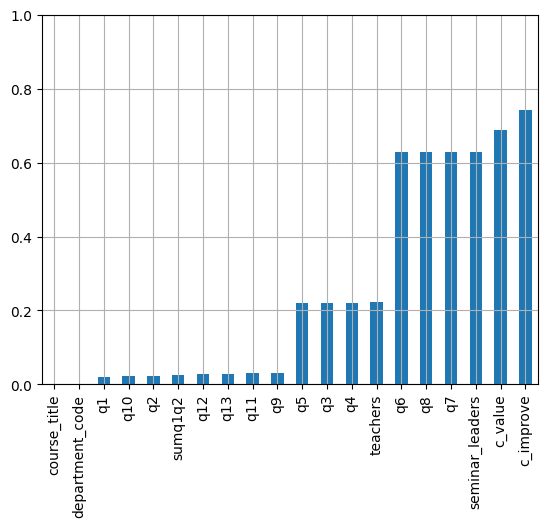

In [180]:
(df.isnull().sum()/df.shape[0]).sort_values().plot.bar(ylim=(0,1),grid=True)

## Matplotlib <a name="introduction"></a>

* "A picture is worth a thousand words."
    * more like "A picture is worth a few lines of code."
* development started in 2003 by John D. Hunter, a neurobiologist (inspired by MATLAB software)
* generating basic plots in *matplotlib* is simple, mastering the library can be little bit less pleseant (we skip this part)
* you can have as much control as you want, but you can also concede as much control as you want 
* [**gallery**](https://matplotlib.org/stable/gallery/index.html)
    * can get help to problems like "I want to make a figure that looks something I've seen somewhere." (hard to google)
* plotting consists of many layers, from general 'contour this 2D array' to very specific 'color this screen pixel'
    * key is allowing both levels to coexist in one package
* *matplotlib* has 2 interfaces:
    1. "state-machine environment" (based on MATLAB)
    2. a object-oriented interface
* this often creates confusion (multiple, conflicting, solutions on the web)
* another common confusion is the relationship of *Matplotlib, pyplot and pylab*
    * Matplotlib is the whole package
    * `matplotlib.pyplot` is a module in matplotlib
    * `pylab` is a a convenience module doing a bulk import of `pyplot` and `numpy`

* [anatomy of the plot](https://matplotlib.org/examples/showcase/anatomy.html) from matplotlib

<img src= "https://matplotlib.org/_images/anatomy.png" width= "600" height="400">

* the *figure* keeps track of all the child *Axes*, titles,legends, etc.
    * the figure can have any number of *Axes*
* *Axes* is 'a plot', i.e. the region of the image with the data space
    * given *Axes* object can only be in one Figure
    * *Axes* contains 2 (3 in case of 3D) *Axis* objects which take care of the data limits (conrolled via `set_xlim()` method)
    * each *Axes* has a title (`set_title()`), an x- and y-labels (`set_xlabel()`)
* *Artist* is anything you can see on the figure, e.g. text objects, Line2D objects, etc.

* `matplolib.pyplot` functions make some changes to a figure, e.g. create a figure, plot some lines, etc.
    * the plotting functions are directed to the current axes

* all of plotting functions expect `np.array` or `array-like` data objects (for majority of cases works out of the box)

In [181]:
# increasing the size of the figure
plt.figure(figsize = (20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

Solarize_Light2


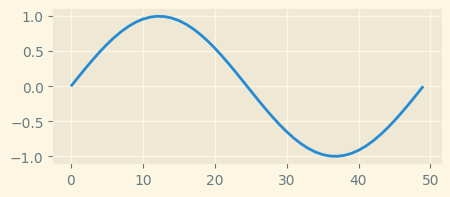

_classic_test_patch


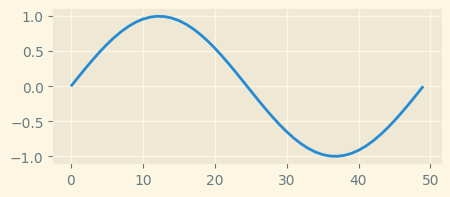

_mpl-gallery


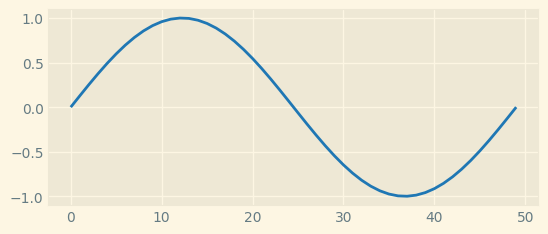

_mpl-gallery-nogrid


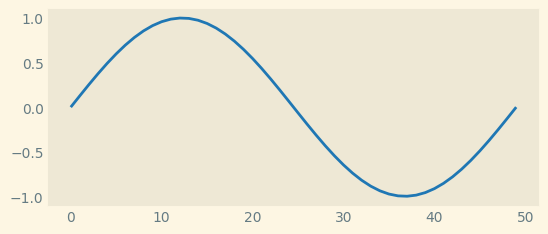

bmh


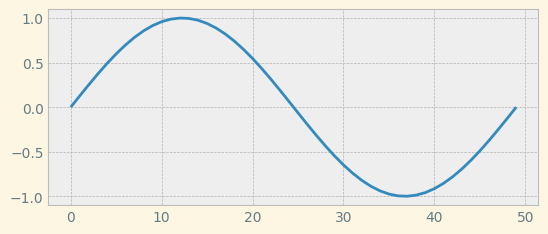

classic


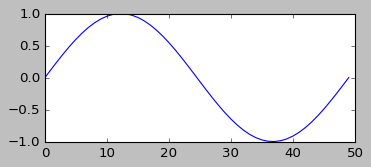

dark_background


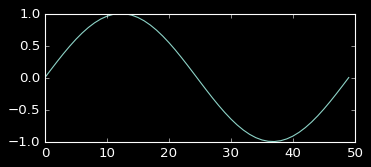

fast


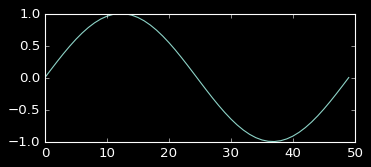

fivethirtyeight


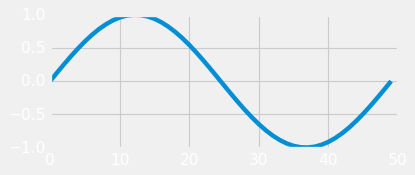

ggplot


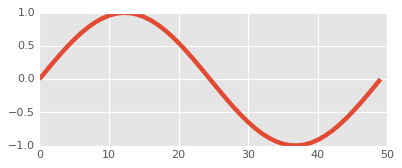

grayscale


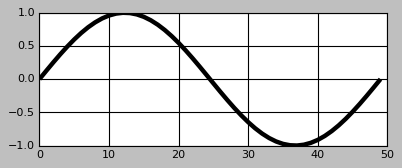

seaborn-v0_8


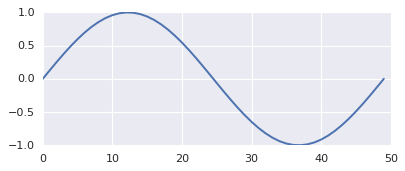

seaborn-v0_8-bright


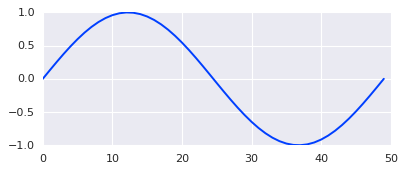

seaborn-v0_8-colorblind


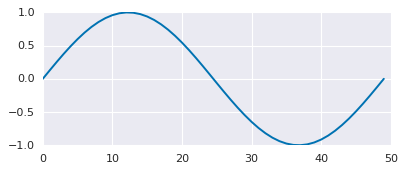

seaborn-v0_8-dark


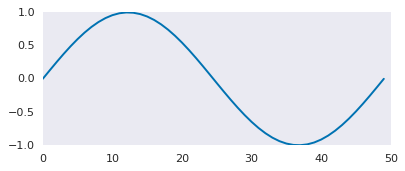

seaborn-v0_8-dark-palette


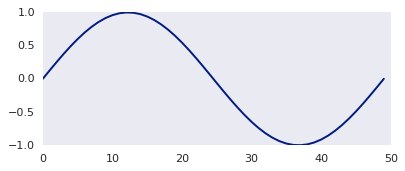

seaborn-v0_8-darkgrid


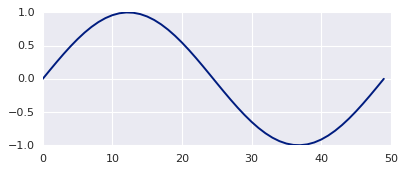

seaborn-v0_8-deep


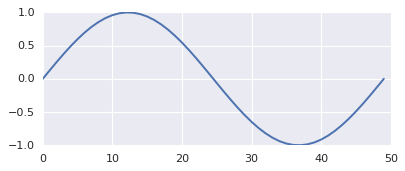

seaborn-v0_8-muted


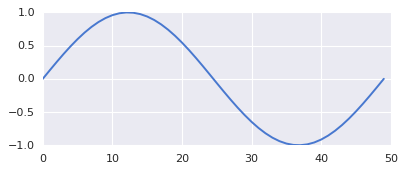

seaborn-v0_8-notebook


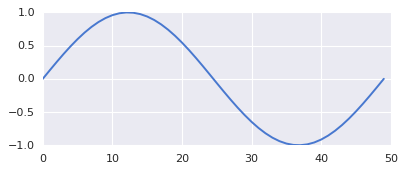

seaborn-v0_8-paper


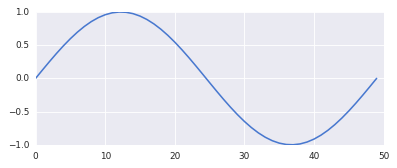

seaborn-v0_8-pastel


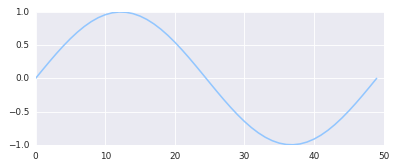

seaborn-v0_8-poster


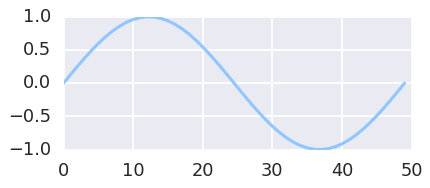

seaborn-v0_8-talk


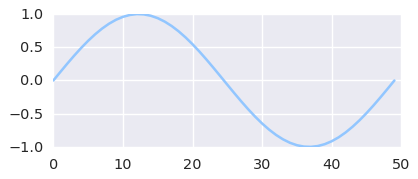

seaborn-v0_8-ticks


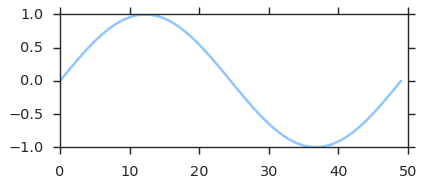

seaborn-v0_8-white


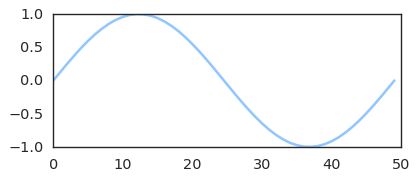

seaborn-v0_8-whitegrid


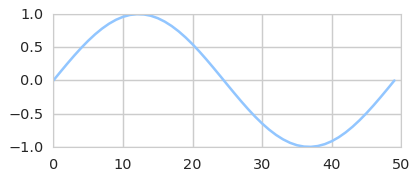

tableau-colorblind10


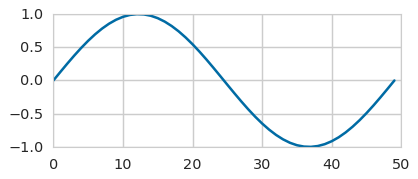

In [182]:
from time import sleep
for style in plt.style.available:
    plt.style.use(style)
    print(style)
    plt.figure(figsize=(5,2))
    plt.plot(np.sin(np.linspace(0,2*np.pi)))
    plt.show()
    sleep(1)

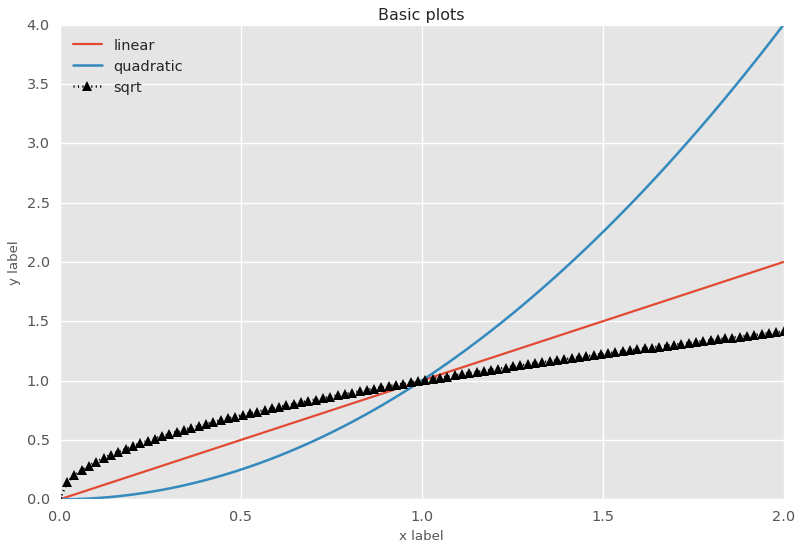

In [183]:
plt.style.use('ggplot')
# minimum example of pyplot
x = np.linspace(0, 2, 100)

# we can also specify only "y" and use default x-axis: plt.plot(x, label='linear')
plt.plot(x, x, label='linear',  linewidth=2.0)
plt.plot(x, x**2, label='quadratic')
plt.plot(x, np.sqrt(x),'k^:',label='sqrt')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Basic plots")

plt.legend(loc = 'best');

* for multiple subplots: `fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))`
* call `plt.subplot()` and specify three numbers:
    * number of rows
    * number of columns
    * subplot number you want to activate.
* if subplots are too squished `plt.tight_layout()`

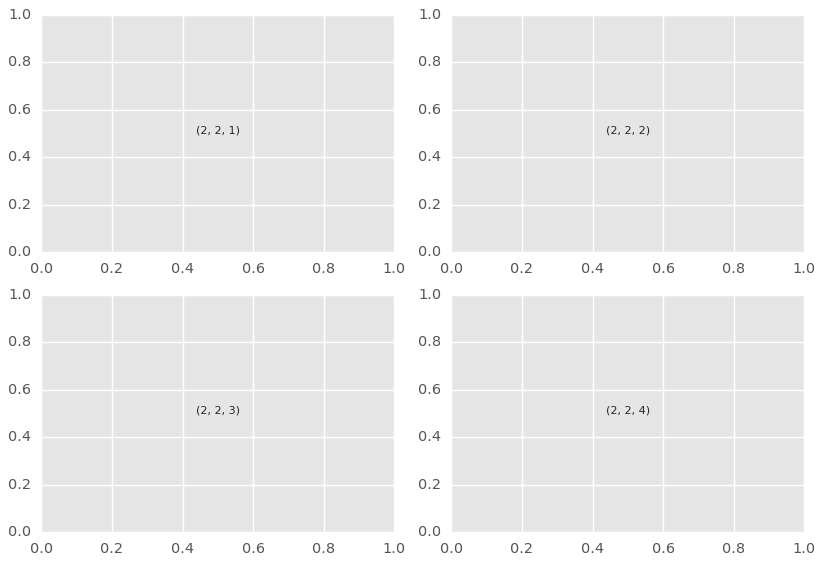

In [184]:
for i in range (1, 5):
    plt.subplot(2, 2, i)
    plt.text(0.5,0.5, str((2, 2, i)), ha='center', fontsize = 10) #again, just a plot
    plt.tight_layout() 
    plt.grid(True) # add the grid

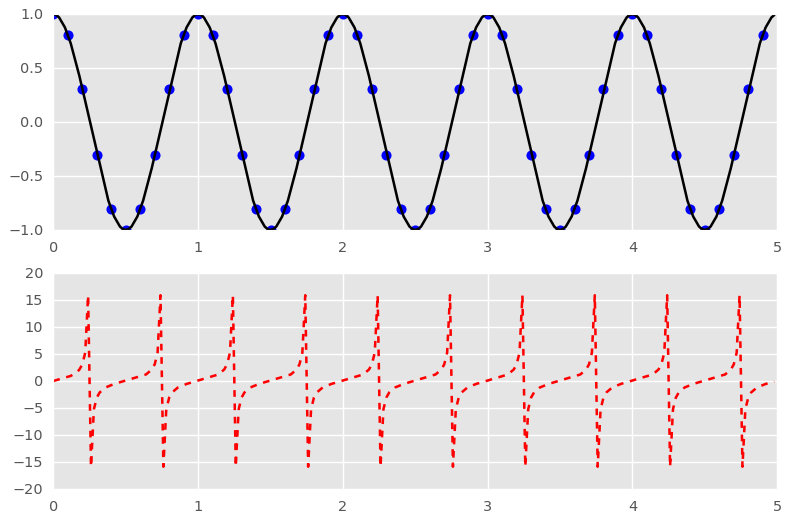

In [185]:
# for multiple figures and axes 
def f(x):
    return np.cos(2*np.pi*x)

x1 = np.arange(0.0, 5.0, 0.1)
x2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) # optional, since figure(1) will be created by default
plt.subplot(211)
plt.plot(x1, f(x1), 'bo', x2, f(x2), 'k')

plt.subplot(212)
plt.plot(x2, np.tan(2*np.pi*x2), 'r--')

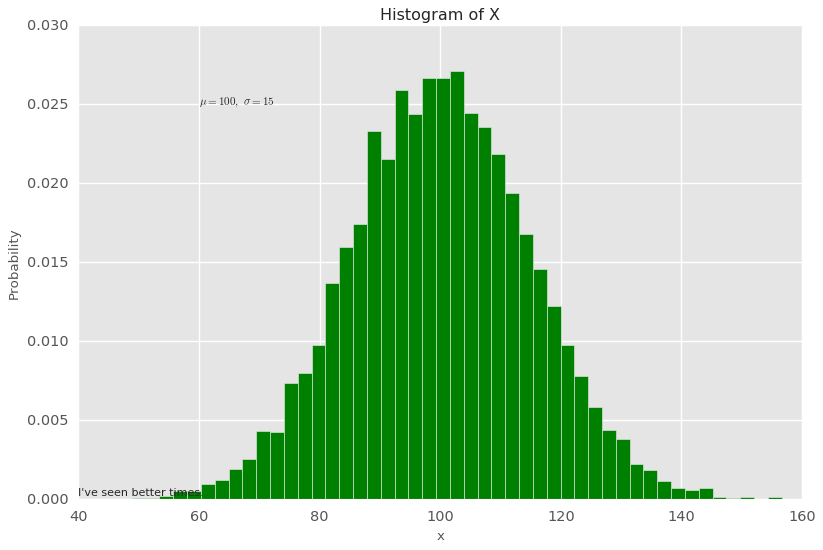

In [186]:
mu, sigma, n = 100, 15, 10000
x = np.random.normal(mu, sigma, n)

# the histogram of the data
plt.hist(x, bins = 50, density= True, facecolor='g')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram of X')

# meaningful text
plt.text(60, .025, f'$\mu={mu},\ \sigma={sigma}$')
# tail events text
plt.text(40, .00025, f"I've seen better times.")

plt.grid(True)

## Saving plots

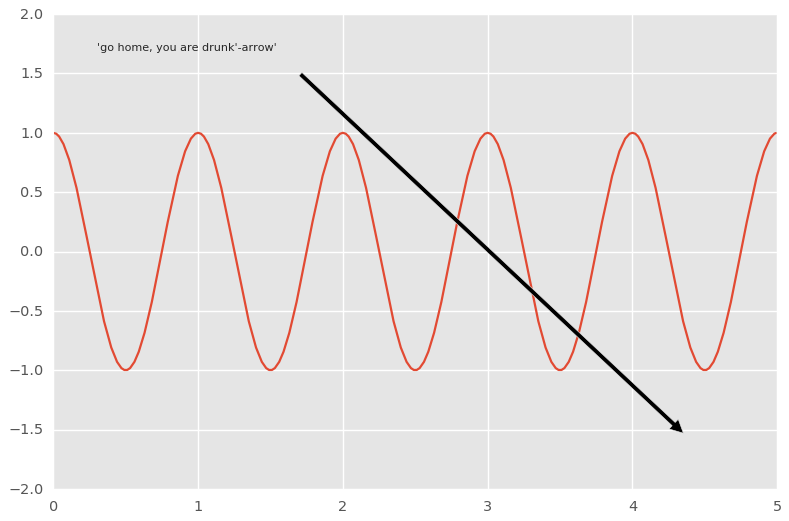

In [187]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.annotate("'go home, you are drunk'-arrow'", xy=(4.5, -1.7), xytext=(0.3, 1.7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.ylim(-2, 2)

# actually saving
plt.savefig('auxiliary/go_home_you_drunk.png')